In [1]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx
import os

### Data Analysis

- Data Source: https://gml.noaa.gov/ccgg/carbontracker/download.php
- View a single daily CO2 Component file and try to understand its data

In [2]:
# Extracting variables
file_path = "/Volumes/Seagate Backup Plus Drive/USRA/NOAA/CT2022.molefrac_glb3x2_2000-01-01.nc"
dataset = Dataset(file_path, mode="r")
print(dataset.variables.keys())

dict_keys(['air_mass', 'blh', 'boundary', 'calendar_components', 'co2', 'decimal_date', 'gph', 'latitude', 'level', 'longitude', 'orography', 'pbl_co2', 'pressure', 'specific_humidity', 'temperature', 'time', 'time_components', 'u', 'v'])


In [3]:
co2_var = dataset.variables['co2']
co2_var

<class 'netCDF4._netCDF4.Variable'>
float32 co2(time, level, latitude, longitude)
    _FillValue: -1e+34
    cell_methods: time: mean
    units: micromol mol-1
    comment: CT2022 estimate of total atmospheric carbon dioxide
unlimited dimensions: time
current shape = (8, 34, 90, 120)
filling on

In [4]:
pressure_var = dataset.variables["pressure"]
pressure_var

<class 'netCDF4._netCDF4.Variable'>
float32 pressure(time, boundary, latitude, longitude)
    units: Pa
    _FillValue: -1e+34
    long_name: air_pressure
    comment: air pressure at level boundaries
    cell_methods: time: mean
unlimited dimensions: time
current shape = (8, 35, 90, 120)
filling on

In [5]:
date_var = dataset.variables["time"]
date_var

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 2000-01-01 00:00:00 UTC
    long_name: time
    cell_methods: time: mean
unlimited dimensions: time
current shape = (8,)
filling on, default _FillValue of 9.969209968386869e+36 used

## Task 1

### Extracting Variables
- We are interested in the co2 variable
- the co2 and pressure variable is represented as a 4D array (time steps, levels, latitude, longitude)

In [6]:
time_idx = 0
co2_level_0 = co2_var[time_idx, 0, :, :]  # 2D map of CO₂
co2_level_17 = co2_var[time_idx, 16, :, :] 
co2_level_34 = co2_var[time_idx, 33, :, :] 
print(co2_level_0)

[[366.59973 366.59973 366.59973 ... 366.6029  366.6029  366.6029 ]
 [366.5652  366.5652  366.5653  ... 366.57117 366.57104 366.57104]
 [366.54517 366.54492 366.5448  ... 366.56714 366.56714 366.56702]
 ...
 [374.95178 374.95117 374.95142 ... 375.28882 375.28918 375.29004]
 [375.04907 375.04993 375.05017 ... 375.2212  375.2235  375.2246 ]
 [375.12012 375.13184 375.14    ... 375.31335 375.31262 375.31274]]


### Visualization

In [7]:
# Mask fill values
co2_map_l0 = np.ma.masked_equal(co2_level_0, -1e+34)
co2_map_l17 = np.ma.masked_equal(co2_level_17, -1e+34)
co2_map_l34 = np.ma.masked_equal(co2_level_34, -1e+34)

In [8]:
'''# Flatten and mask values
vmin = min(co2_map_l0.min(), co2_map_l17.min(), co2_map_l34.min())
vmax = max(co2_map_l0.max(), co2_map_l17.max(), co2_map_l34.max())'''

'# Flatten and mask values\nvmin = min(co2_map_l0.min(), co2_map_l17.min(), co2_map_l34.min())\nvmax = max(co2_map_l0.max(), co2_map_l17.max(), co2_map_l34.max())'

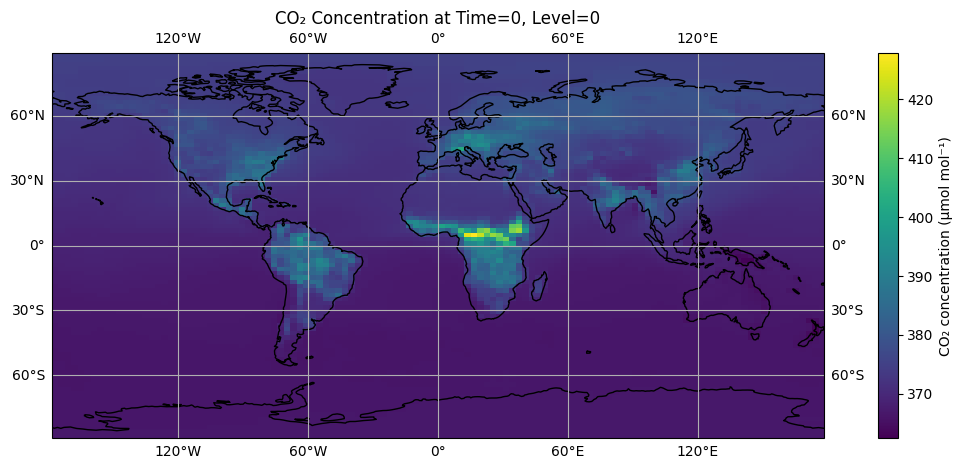

In [9]:
### LEVEL 0 ###

# Extract latitude and longitude
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
extent = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

fig, ax = plt.subplots(figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})  # Wider figure
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())

# Plot CO₂ data
img = ax.imshow(co2_map_l0, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree())
#img = ax.imshow(co2_map_l0, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Colorbar
plt.colorbar(img, label='CO₂ concentration (µmol mol⁻¹)')
plt.title('CO₂ Concentration at Time=0, Level=0')

plt.show()

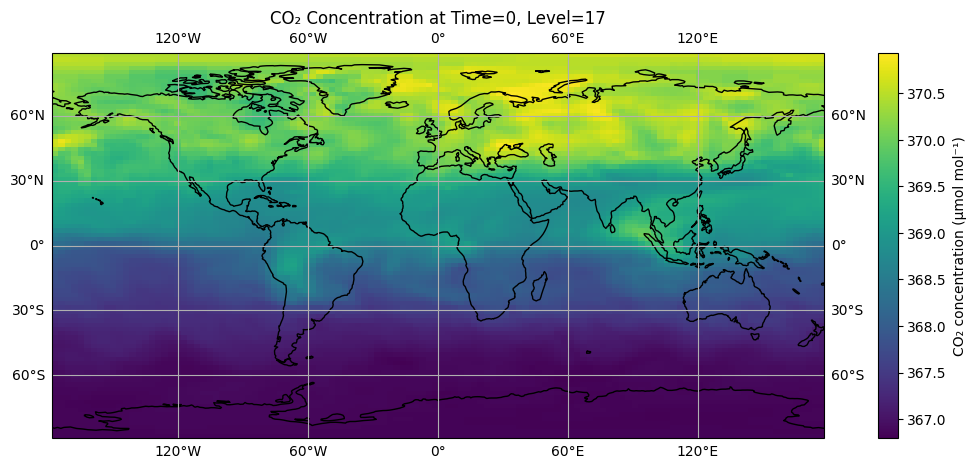

In [10]:
### LEVEL 17 ###

# Extract latitude and longitude
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
extent = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

fig, ax = plt.subplots(figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})  # Wider figure
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())

# Plot CO₂ data
img = ax.imshow(co2_map_l17, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree())
#img = ax.imshow(co2_map_l17, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Colorbar
plt.colorbar(img, label='CO₂ concentration (µmol mol⁻¹)')
plt.title('CO₂ Concentration at Time=0, Level=17')

plt.show()

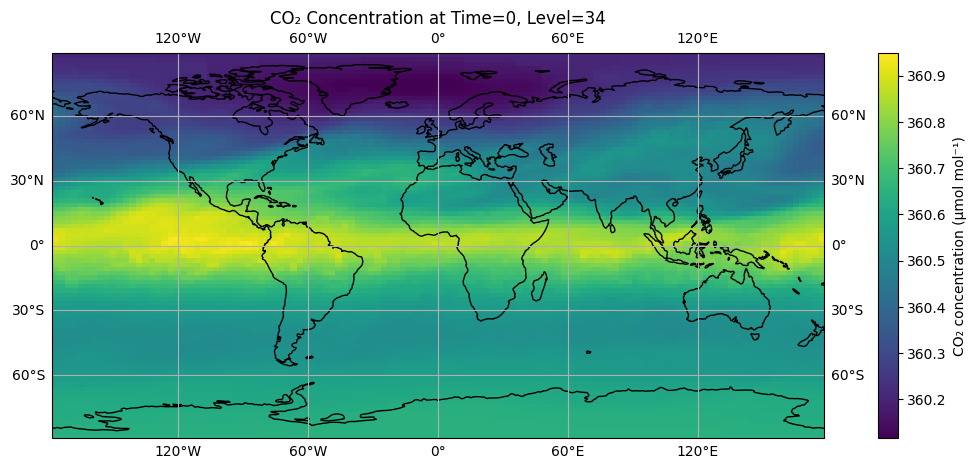

In [11]:
### LEVEL 34 ###

# Extract latitude and longitude
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
extent = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

fig, ax = plt.subplots(figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})  # Wider figure
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())

# Plot CO₂ data
img = ax.imshow(co2_map_l34, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree())
#img = ax.imshow(co2_map_l34, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Colorbar
plt.colorbar(img, label='CO₂ concentration (µmol mol⁻¹)')
plt.title('CO₂ Concentration at Time=0, Level=34')

plt.show()

In [12]:
#longitudes

### Cross-sectional Analysis

<Axes: title={'center': 'CO₂ Concentration Cross-Section at 34°W'}, xlabel='Latitude (°)', ylabel='Atmospheric Level'>

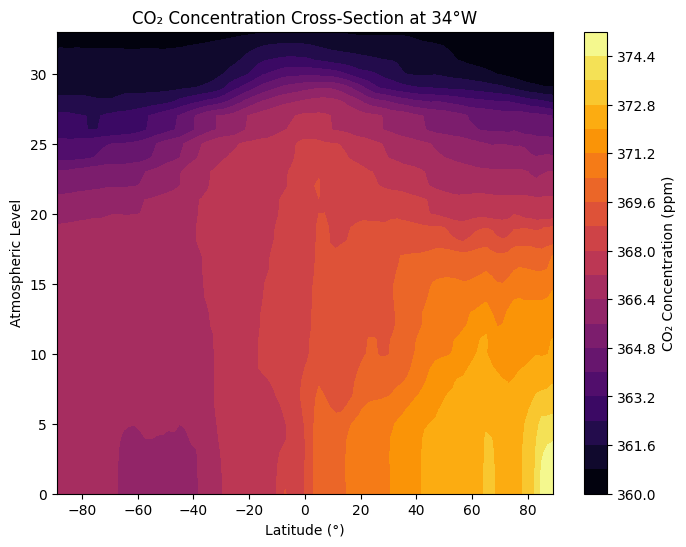

In [13]:
# Extract latitude, longitude, and CO₂ data
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
co2_data = dataset.variables['co2'][0, :, :, :]

# Find the closest longitude index to 34°W
target_lon = -34
lon_index = np.argmin(np.abs(longitudes - target_lon))

# Extract CO₂ data at 34°W across all levels and latitudes
co2_cross_section = co2_data[:, :, lon_index]

# Define level indices
levels = np.arange(34)

# Plot the cross-sectional diagram
plt.figure(figsize=(8, 6))
plt.contourf(latitudes, levels, co2_cross_section, cmap="inferno", levels=20)
plt.colorbar(label="CO₂ Concentration (ppm)")
plt.xlabel("Latitude (°)")
plt.ylabel("Atmospheric Level")
plt.title("CO₂ Concentration Cross-Section at 34°W")
plt.gca()

### Questions
- Each daily file is ~9MB which is a lot of space if I have to download all, how to address this?
- Do I use each visualization to create the animation that we discussed last meeting?

## Task 2

- We discussed that we can covert the multiple level CO₂ values into the column averaged CO₂ (single number)   
- Assume the column averaged CO₂ is a pressure weighted sum of multi level CO₂ values  
    - CO₂ = Σ (CO₂(i) * Δp(i)) / Σ(Δp(i))
    - CO₂(i) = CO₂ concentration at level i
    - Δp(i) = pressure difference between adjacent levels
- This is a useful metric because it represents the total CO₂ concentration across all vertical atmospheric levels

In [14]:
# Extract CO₂ data (shape: time, level, lat, lon)
co2_data = dataset.variables['co2'][0, :, :, :]  # (34, 90, 120)

# Extract pressure data (shape: time, level, lat, lon)
pressure_data = dataset.variables['pressure'][0, :, :, :] # (35, 90, 120)

# Compute pressure differences between levels (Δp)
pressure_diff = np.abs(np.diff(pressure_data, axis=0)) # (34, 90, 120)

In [15]:
weighted_co2 = co2_data[:, :, :] * pressure_diff

# Sum over the vertical levels to get total CO₂ and total pressure difference
column_co2 = np.sum(weighted_co2, axis=0) 
total_pressure = np.sum(pressure_diff, axis=0) 

# Compute column-averaged CO₂
xco2 = column_co2 / total_pressure  # (90, 120)

Text(0.5, 1.0, 'Column-Averaged CO₂ at Time=0')

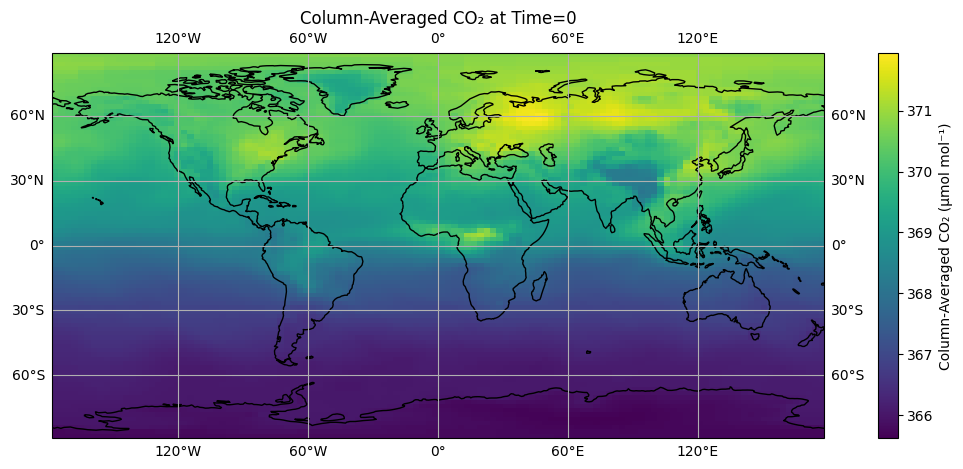

In [16]:
# Extract latitude and longitude
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
extent = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

fig, ax = plt.subplots(figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})  # Wider figure
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Plot CO₂ data
img = ax.imshow(xco2, origin='lower', cmap='viridis', extent=extent, transform=ccrs.PlateCarree())

# Other features
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.colorbar(img, label='Column-Averaged CO₂ (µmol mol⁻¹)')
plt.title('Column-Averaged CO₂ at Time=0')

### Observations

- CO2 Concentration in Level Analysis
    - Level 0 — CO2 concentration is higher in land masses
    - Level 17 — CO2 concentration is higher in the northern hemisphere
    - Level 34 — CO2 concentration is higher along the equator
- CO2 Concentration in the Column-Averaged Analysis
    - CO2 concentrations higher in northern hemisphere
- Future Step?
    - Need to look at seasonal variations (currently working with only one .nc file)

### Next Steps
- Cross section of CO2
    - Longitude N to S
    - Latitude 34 W
- Comparison
    - Pick any 1 month interval in Gosat and Carbon Tracker
    - Make Scatterplots of them

### Year 2010

Downloading from NOAA's CarbonTracker:
- Trying to use wget
- 730 files, ~17GB
- Will need to find an efficient way to loop through each file to create a scatterplot

In [17]:
import os

directory = "/Volumes/Seagate Backup Plus Drive/USRA/NOAA/CT_Jan_Data"
files = os.listdir(directory)
print("Files found:", files[:5])  # Try printing the first few

Files found: ['CT2022.molefrac_glb3x2_2010-01-16.nc', 'CT2022.molefrac_glb3x2_2010-01-17.nc', 'CT2022.molefrac_glb3x2_2010-01-18.nc', 'CT2022.molefrac_glb3x2_2010-01-19.nc', 'CT2022.molefrac_glb3x2_2010-01-20.nc']


In [20]:
# Directory containing your NetCDF files
directory = "/Volumes/Seagate Backup Plus Drive/USRA/NOAA/CT_Jan_Data"

# List to store data from all files
CT_jan = []

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)
        
        with Dataset(file_path, 'r') as data:
            # Extract and convert time
            time_var = data.variables['time']
            time_values = time_var[:]
            time_units = time_var.units
            calendar = getattr(time_var, 'calendar', 'standard')

            # Convert to native Python datetime (no pandas)
            time_datetime = num2date(time_values, units=time_units, calendar=calendar)

            # Extract other variables
            co2 = data.variables['co2'][:]
            pressure = data.variables['pressure'][:]
            latitude = data.variables['latitude'][:]
            longitude = data.variables['longitude'][:]

            # Store everything
            CT_jan.append({
                'filename': filename,
                'time': time_datetime,  # already native Python datetime
                'co2': co2,
                'pressure': pressure,
                'latitude': latitude,
                'longitude': longitude
            })


### Notes
- A different CO2 array and pressure array for each time steps
- Since it is in levels, need lat/lon in table?

In [21]:
records = []

for entry in CT_jan:
    co2 = entry['co2']            # shape: (time, level, lat, lon)
    pressure = entry['pressure']  # shape: (time, level+1, lat, lon)
    times = entry['time']
    lats = entry['latitude']
    lons = entry['longitude']

    for t_idx, t in enumerate(times):
        co2_t = co2[t_idx, :, :, :]             # (level, lat, lon)
        pressure_t = pressure[t_idx, :, :, :]   # (level+1, lat, lon)

        # Compute Δp between pressure layers (diff along level axis)
        delta_p = np.abs(np.diff(pressure_t, axis=0))  # (level, lat, lon)

        # Weighted CO₂ sum
        weighted_co2 = co2_t * delta_p                # (level, lat, lon)
        column_co2 = np.sum(weighted_co2, axis=0) / np.sum(delta_p, axis=0)  # (lat, lon)

        # Create coordinate grid
        lon_grid, lat_grid = np.meshgrid(lons, lats)

        # Flatten for table
        for i in range(lat_grid.shape[0]):
            for j in range(lat_grid.shape[1]):
                value = column_co2[i, j]
                if value != -1e+34:  # skip fill values
                    records.append({
                        'time': t,
                        'latitude': lat_grid[i, j],
                        'longitude': lon_grid[i, j],
                        'co2_column_avg': value
                    })

# Convert to DataFrame
df_column_avg = pd.DataFrame.from_records(records)


In [22]:
df_column_avg

,time,latitude,longitude,co2_column_avg
0,2010-01-16 01:30:00,-89.0,-178.5,384.200195
1,2010-01-16 01:30:00,-89.0,-175.5,384.200287
2,2010-01-16 01:30:00,-89.0,-172.5,384.200714
3,2010-01-16 01:30:00,-89.0,-169.5,384.201630
4,2010-01-16 01:30:00,-89.0,-166.5,384.203003
...,...,...,...,...
1295995,2010-01-28 22:30:00,89.0,166.5,389.716248
1295996,2010-01-28 22:30:00,89.0,169.5,389.715424
1295997,2010-01-28 22:30:00,89.0,172.5,389.714447
1295998,2010-01-28 22:30:00,89.0,175.5,389.713470


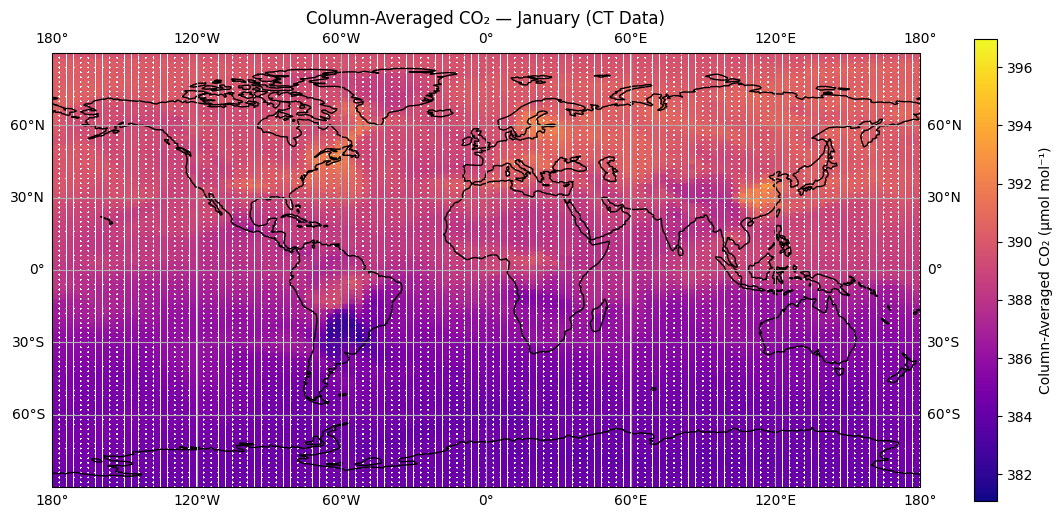

In [23]:
# Extract relevant columns
latitudes = df_column_avg['latitude']
longitudes = df_column_avg['longitude']
co2_values = df_column_avg['co2_column_avg']

# Set up map
fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)

# Scatterplot of CO₂
sc = ax.scatter(longitudes, latitudes, c=co2_values, cmap='plasma', s=10, transform=ccrs.PlateCarree())

# Colorbar and title
plt.colorbar(sc, label='Column-Averaged CO₂ (µmol mol⁻¹)')
plt.title('Column-Averaged CO₂ — January (CT Data)')
plt.show()
